<h1 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Project Topic: Pricing Analysis of the Third Convertible Bond of East Money Company (CN)</h1>
<h3 align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Author: JeffLin99, Email: jeffhengyu1999@hotmail.com</h3>

<div>1. Project Background；<div> 
<div>&ensp;&ensp;&ensp;&ensp;In general, the purpose of a company issuing convertible bonds is to raise funds rather than providing investors with a convenient opportunity to convert to stocks. Therefore, when setting the conversion price, the company considers various factors such as market conditions, interest rates, stock performance, etc., to ensure the successful issuance of convertible bonds and to bring sufficient funds to the company. At the same time, the setting of the conversion price also needs to take into account the interests of investors, allowing them to choose to convert to stocks at the right time. As a result, the conversion price of convertible bonds is generally higher than the market price of the regular shares. Of course, there are exceptions as well. For example, when a company needs to raise a large amount of capital but its stock performance is poor and the market lacks confidence in the company's future prospects, the company may set a lower conversion price to attract investors to purchase convertible bonds.<div>

<div>&ensp;&ensp;&ensp;&ensp;Clearly, for East Money Company's first convertible bond (hereinafter referred to as "East Money Convertible Bond 1"), it falls into the latter category, as the conversion price it has set is mostly lower than the regular stock price (see Figure 1-1). Therefore, the purpose of issuing this convertible bond is to allow investors to exercise their rights during the conversion period and convert the convertible bond into the company's stock. In doing so, East Money can achieve a secondary round of financing, raising cash needed for production expansion, product updates, and enhancing operational capabilities. This is highly beneficial for the company's development. It can be inferred that East Money actually hopes that holders of the convertible bonds will convert them into regular stocks during the conversion period. This way, the company doesn't need to repay the principal, and generally, the interest rate on convertible bonds is also very low, significantly reducing the company's financing costs.<div>
<div>&ensp;<div>

<div>2. East Money Company Convertible Bond 1 Theoretical Pricing vs Actual Price;<div>
<div>&ensp;&ensp;&ensp;&ensp;The academic research on convertible bond pricing models has a history of over 60 years. The earliest studies on convertible bond pricing date back to the 1960s. The main idea was quite straightforward, simply discounting the higher of the Bond Value and the Convertible Value. Subsequently, the emergence of the Black-Scholes option pricing formula (1973) and the Merton corporate bond pricing theory (1974) provided a more scientific research paradigm for convertible bond pricing. Following that, scholars like Ingersoll (1977), Brennan and Schwartz (1977), and others continuously expanded and gradually built the theoretical framework for modern convertible bond pricing.<div>

<div>&ensp;&ensp;&ensp;&ensp;In terms of types, convertible bond pricing models can be categorized as simple models and structural models, or single-factor models and multi-factor models. Academically, three core factors are considered to influence convertible bond value: company value, interest rates, and credit default risk. Among them, the judgment of company value is, of course, the most crucial. Therefore, based on scholars' understanding of company value, convertible bond pricing models can be divided into "structural models with the entire company value as a variable" and "simple models using the stock price as a variable." The former was proposed by Merton in 1974, where he regarded the company value as following a diffusion process and treated the convertible bond as an option based on the company value. The latter was first proposed by McConnell and Schwartz in 1986, characterized by convertible bond pricing being entirely based on the stock price. Depending on the number of factors included in the model, convertible bond pricing models can also be categorized as single-factor, two-factor, and multi-factor models.<div>

<div>&ensp;&ensp;&ensp;&ensp;In this study, three models – Black-Scholes, binomial tree, and Monte Carlo – were primarily used to price the option value component of East Money Convertible Bond 1. These were combined with the pure bond price estimated using a general cash flow discounting model. The final theoretical price was determined and compared with the actual price and the stock price, followed by an analysis of the application and pros and cons of each model.<div>

### Packages from third-party tool libraries used:

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import math
import numpy as np
from scipy.stats import norm
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

### Read East Money Company (CN) stock data

In [2]:
stock_data = pd.read_excel('Data\TRD_Dalyr.xlsx')
stock_data

,Stkcd,Trddt,Opnprc,Hiprc,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,...,Dretnd,Adjprcwd,Adjprcnd,Markettype,Capchgdt,Trdsta,Ahshrtrd_D,Ahvaltrd_D,PreClosePrice,ChangeRatio
0,证券代码,交易日期,日开盘价,日最高价,日最低价,日收盘价,日个股交易股数,日个股交易金额,日个股流通市值,日个股总市值,...,不考虑现金红利的日个股回报率,考虑现金红利再投资的收盘价的可比价格,不考虑现金红利的收盘价的可比价格,市场类型,最新股本变动日期,交易状态,日盘后成交总量,日盘后成交总额,昨收盘(交易所),涨跌幅
1,没有单位,没有单位,元/股,元/股,元/股,元/股,股,元,千元,千元,...,没有单位,元/股,元/股,没有单位,没有单位,没有单位,股,元,元/股,NaN
2,300059,2017-01-03,17,17.21,16.99,17.08,38645753,660102482.7,45231951.57,60776127.79,...,0.00886,380.251583,371.878104,16,2016-12-30,1,NaN,NaN,16.93,0.00886
3,300059,2017-01-04,17,17.31,16.9,17.29,60292773,1034325828.22,45788082.12,61523375.26,...,0.012295,384.926807,376.450376,16,2016-12-30,1,NaN,NaN,17.08,0.012295
4,300059,2017-01-05,17.3,17.4,17.15,17.23,36712677,633420101.41,45629187.67,61309875.98,...,-0.00347,383.591029,375.144013,16,2016-12-30,1,NaN,NaN,17.29,-0.00347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,300059,2021-12-27,37.77,37.77,36.81,36.97,78846379,2926129871,315485765.55,382113187.28,...,-0.009113,2065.789315,2002.934255,16,2021-06-30,1,7600,280972,37.31,-0.009113
1215,300059,2021-12-28,37.18,37.67,36.97,37.66,98658745,3682029527,321373922.93,389244864.29,...,0.018664,2104.344755,2040.316582,16,2021-06-30,1,15600,587496,36.97,0.018664
1216,300059,2021-12-29,37.63,37.64,36.25,36.31,127431304,4689823140,309853615.01,375291583.18,...,-0.035847,2028.910198,1967.177246,16,2021-06-30,1,34300,1245433,37.66,-0.035847
1217,300059,2021-12-30,36.3,37.4,35.91,37.04,132751583,4893113060,316083114.85,382836690.74,...,0.020105,2069.700736,2006.726665,16,2021-06-30,1,13000,481520,36.31,0.020105


In [3]:
stk_data = stock_data
stk_data = stk_data.loc[2:,['Stkcd','Trddt','Clsprc','Dretwd']]
stk_data.reset_index(inplace=True,drop=True)
stk_data['Trddt'] = pd.to_datetime(stk_data['Trddt'])
stk_data

,Stkcd,Trddt,Clsprc,Dretwd
0,300059,2017-01-03,17.08,0.00886
1,300059,2017-01-04,17.29,0.012295
2,300059,2017-01-05,17.23,-0.00347
3,300059,2017-01-06,17.07,-0.009286
4,300059,2017-01-09,17.1,0.001757
...,...,...,...,...
1212,300059,2021-12-27,36.97,-0.009113
1213,300059,2021-12-28,37.66,0.018664
1214,300059,2021-12-29,36.31,-0.035847
1215,300059,2021-12-30,37.04,0.020105


In [4]:
stk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Stkcd   1217 non-null   object        
 1   Trddt   1217 non-null   datetime64[ns]
 2   Clsprc  1217 non-null   object        
 3   Dretwd  1217 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 38.2+ KB


In [5]:
for i in stk_data.columns[2:]:
    stk_data[i] = stk_data[i].astype(float)
stk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Stkcd   1217 non-null   object        
 1   Trddt   1217 non-null   datetime64[ns]
 2   Clsprc  1217 non-null   float64       
 3   Dretwd  1217 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 38.2+ KB


### Reading Oriental Fortune Convertible Bond 1 Historical Data

In [6]:
convt_bond = pd.read_excel('Data\BND_Cbdrpch.xlsx')
convt_bond

,Liscd,Sctcd,Trddt,Pretrdd,Opnprc,Clsprc,Dhiprc,Dloprc,Dlbndtrd,Dnvaltrd,Chge,Perchge,Dpervolt,Stkprc,Sperchge,Cnvtprc,Percnvt,Cnvtvalu,Cvtprmrt
0,债券代码,交易市场代码,交易日期,前一交易日,日开盘价,日收盘价,日最高成交价,日最低成交价,日总成交数量,日总成交金额,涨跌,涨跌幅,期间振幅,正股价格,正股涨跌幅,转股价格,转股比例,转换价值,转股溢价率(%)
1,没有单位,没有单位,没有单位,没有单位,元/张,元/张,元/张,元/张,手,元,元,没有单位,没有单位,元,没有单位,元,没有单位,元,没有单位
2,123006,2,2018-01-29,NaN,125,121.65,126,121,2738534,3368210299.44,21.65,21.65,5,16.08,-0.02,13.69,0,117.458,3.5877
3,123006,2,2018-01-30,2018-01-29,121,120.617,122.21,120,541840,656467576.21,-1.03,-0.85,1.82,15.88,-0.01,13.69,0,115.9971,4.0026
4,123006,2,2018-01-31,2018-01-30,120.23,118.6,120.23,117.8,310699,369000855.34,-2.02,-1.67,2.01,15.29,-0.04,13.69,0,111.6874,6.2108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,123006,2,2019-05-06,2019-04-30,134,127.5,136.45,126.55,383206,502324207.1,-16.32,-11.35,6.88,14.75,-0.1,11.36,63.3188,129.8415,-1.6871
306,123006,2,2019-05-07,2019-05-06,130,131.351,132.6,128.001,366271,478587329.02,3.85,3.02,3.61,15.04,0.02,11.36,63.3188,132.3944,-0.6733
307,123006,2,2019-05-08,2019-05-07,128.5,131.88,135.2,128.49,221486,293779439.09,0.53,0.4,5.11,15.05,0,11.36,63.3188,132.4824,-0.3392
308,123006,2,2019-05-09,2019-05-08,130.501,131.901,134.5,130.501,238358,317676314.76,0.02,0.02,3.03,15.05,0,11.36,63.3188,132.4824,-0.3219


In [7]:
convt_bond = convt_bond.loc[2:,['Liscd','Trddt','Clsprc','Perchge','Stkprc','Cnvtprc','Percnvt','Cnvtvalu','Cvtprmrt']]
convt_bond['Convt_num'] = 100/convt_bond['Cnvtprc']
convt_bond['Cond_redempt'] = convt_bond['Cnvtprc']*1.30
convt_bond['Trddt'] = pd.to_datetime(convt_bond['Trddt'])
convt_bond

,Liscd,Trddt,Clsprc,Perchge,Stkprc,Cnvtprc,Percnvt,Cnvtvalu,Cvtprmrt,Convt_num,Cond_redempt
2,123006,2018-01-29,121.65,21.65,16.08,13.69,0,117.458,3.5877,7.304602,17.797
3,123006,2018-01-30,120.617,-0.85,15.88,13.69,0,115.9971,4.0026,7.304602,17.797
4,123006,2018-01-31,118.6,-1.67,15.29,13.69,0,111.6874,6.2108,7.304602,17.797
5,123006,2018-02-01,117.999,-0.51,15.15,13.69,0,110.6647,6.6492,7.304602,17.797
6,123006,2018-02-02,119.081,0.92,15.15,13.69,0,110.6647,7.6278,7.304602,17.797
...,...,...,...,...,...,...,...,...,...,...,...
305,123006,2019-05-06,127.5,-11.35,14.75,11.36,63.3188,129.8415,-1.6871,8.802817,14.768
306,123006,2019-05-07,131.351,3.02,15.04,11.36,63.3188,132.3944,-0.6733,8.802817,14.768
307,123006,2019-05-08,131.88,0.4,15.05,11.36,63.3188,132.4824,-0.3392,8.802817,14.768
308,123006,2019-05-09,131.901,0.02,15.05,11.36,63.3188,132.4824,-0.3219,8.802817,14.768


In [8]:
convt_bond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 2 to 309
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Liscd         308 non-null    object        
 1   Trddt         308 non-null    datetime64[ns]
 2   Clsprc        308 non-null    object        
 3   Perchge       308 non-null    object        
 4   Stkprc        308 non-null    object        
 5   Cnvtprc       308 non-null    object        
 6   Percnvt       308 non-null    object        
 7   Cnvtvalu      308 non-null    object        
 8   Cvtprmrt      308 non-null    object        
 9   Convt_num     308 non-null    object        
 10  Cond_redempt  308 non-null    object        
dtypes: datetime64[ns](1), object(10)
memory usage: 26.6+ KB


In [9]:
for i in convt_bond.columns[2:]:
    convt_bond[i] = convt_bond[i].astype(float)
convt_bond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 2 to 309
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Liscd         308 non-null    object        
 1   Trddt         308 non-null    datetime64[ns]
 2   Clsprc        308 non-null    float64       
 3   Perchge       308 non-null    float64       
 4   Stkprc        308 non-null    float64       
 5   Cnvtprc       308 non-null    float64       
 6   Percnvt       308 non-null    float64       
 7   Cnvtvalu      308 non-null    float64       
 8   Cvtprmrt      308 non-null    float64       
 9   Convt_num     308 non-null    float64       
 10  Cond_redempt  308 non-null    float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 26.6+ KB


In [10]:
## Interpolation of conversion ratios
itpl = convt_bond.drop_duplicates(subset=['Percnvt'],keep='first')[['Trddt','Percnvt']]
itpl.loc[len(itpl.index)] = [pd.to_datetime('2019-05-13'),99.34]
itpl.set_index('Trddt',inplace=True)
itpl = itpl.resample('D').interpolate()
del convt_bond['Percnvt']
convt_bond = pd.merge(convt_bond,itpl,on=['Trddt'],how='inner')
convt_bond

,Liscd,Trddt,Clsprc,Perchge,Stkprc,Cnvtprc,Cnvtvalu,Cvtprmrt,Convt_num,Cond_redempt,Percnvt
0,123006,2018-01-29,121.650,21.65,16.08,13.69,117.4580,3.5877,7.304602,17.797,0.000000
1,123006,2018-01-30,120.617,-0.85,15.88,13.69,115.9971,4.0026,7.304602,17.797,0.000072
2,123006,2018-01-31,118.600,-1.67,15.29,13.69,111.6874,6.2108,7.304602,17.797,0.000144
3,123006,2018-02-01,117.999,-0.51,15.15,13.69,110.6647,6.6492,7.304602,17.797,0.000217
4,123006,2018-02-02,119.081,0.92,15.15,13.69,110.6647,7.6278,7.304602,17.797,0.000289
...,...,...,...,...,...,...,...,...,...,...,...
303,123006,2019-05-06,127.500,-11.35,14.75,11.36,129.8415,-1.6871,8.802817,14.768,93.736702
304,123006,2019-05-07,131.351,3.02,15.04,11.36,132.3944,-0.6733,8.802817,14.768,94.537173
305,123006,2019-05-08,131.880,0.40,15.05,11.36,132.4824,-0.3392,8.802817,14.768,95.337644
306,123006,2019-05-09,131.901,0.02,15.05,11.36,132.4824,-0.3219,8.802817,14.768,96.138116


### Reading the risk-free rate data (Here, China's 5-year government bond yield is selected)

In [11]:
Rf_data = pd.read_excel('Data\BND_TreasYield.xlsx')
Rf_data

,Trddt,Cvtype,Yeartomatu,Yield
0,日期,收益率曲线类型,剩余年限,收益率(%)
1,没有单位,没有单位,年,没有单位
2,2018-01-29,1,5,3.8433
3,2018-01-30,1,5,3.8533
4,2018-01-31,1,5,3.8337
...,...,...,...,...
316,2019-05-06,1,5,3.1467
317,2019-05-07,1,5,3.1628
318,2019-05-08,1,5,3.1537
319,2019-05-09,1,5,3.142


In [12]:
Riskfree = Rf_data.loc[2:,['Trddt','Yield']]
Riskfree['Trddt'] = pd.to_datetime(Riskfree['Trddt'])
Riskfree.set_index('Trddt',inplace=True,drop=True)
Riskfree['Yield'] = Riskfree['Yield']/100
Riskfree.rename(columns={'Yield':'Riskfree'},inplace=True)
Riskfree['Riskfree'] = Riskfree['Riskfree'].astype(float)
Riskfree

,Riskfree
Trddt,
2018-01-29,0.038433
2018-01-30,0.038533
2018-01-31,0.038337
2018-02-01,0.038339
2018-02-02,0.038340
...,...
2019-05-06,0.031467
2019-05-07,0.031628
2019-05-08,0.031537


### Merging risk-free yield data with East Money Company Convertible Bond 1 data

In [13]:
convt_bond = pd.merge(convt_bond,Riskfree,on=['Trddt'],how='inner')
convt_bond

,Liscd,Trddt,Clsprc,Perchge,Stkprc,Cnvtprc,Cnvtvalu,Cvtprmrt,Convt_num,Cond_redempt,Percnvt,Riskfree
0,123006,2018-01-29,121.650,21.65,16.08,13.69,117.4580,3.5877,7.304602,17.797,0.000000,0.038433
1,123006,2018-01-30,120.617,-0.85,15.88,13.69,115.9971,4.0026,7.304602,17.797,0.000072,0.038533
2,123006,2018-01-31,118.600,-1.67,15.29,13.69,111.6874,6.2108,7.304602,17.797,0.000144,0.038337
3,123006,2018-02-01,117.999,-0.51,15.15,13.69,110.6647,6.6492,7.304602,17.797,0.000217,0.038339
4,123006,2018-02-02,119.081,0.92,15.15,13.69,110.6647,7.6278,7.304602,17.797,0.000289,0.038340
...,...,...,...,...,...,...,...,...,...,...,...,...
303,123006,2019-05-06,127.500,-11.35,14.75,11.36,129.8415,-1.6871,8.802817,14.768,93.736702,0.031467
304,123006,2019-05-07,131.351,3.02,15.04,11.36,132.3944,-0.6733,8.802817,14.768,94.537173,0.031628
305,123006,2019-05-08,131.880,0.40,15.05,11.36,132.4824,-0.3392,8.802817,14.768,95.337644,0.031537
306,123006,2019-05-09,131.901,0.02,15.05,11.36,132.4824,-0.3219,8.802817,14.768,96.138116,0.031420


In [14]:
## Issue premiums
def IssuePrmrt(CnvtBondPrc,PureBondPrc):  #CnvtBondPrc：Convertible bond price；PureBondPrc：Pure bond price
    return (CnvtBondPrc/PureBondPrc)-1

## Break-even price
def BreakEvenPrc(ParValue,Years,ParBondRate):
    return ParValue + Parvalue*Years*ParBondRate

## Conversion price per share
def ImpliedStkPrc(BreakEvenPrc,Convt_num):
    return BreakEvenPrc/Convt_num

## Conversion premium rate
def Cvtprmrt(CnvtBondPrc,Convt_num,StkPrc):
    return CnvtBondPrc/(Convt_num*StkPrc)-1

## （一）Theoretical Pricing of Convertible Bonds under the Black Scholes Model

In [15]:
## Assumptions

# Par value of Bond
ParValue = 100

# Contemporaneous bond rates
ParBondRate = 0.06

# East Money Company Convertible Bond 1 First Interest Payment Date
CouponDate = pd.to_datetime('2018-12-20')

# East Money Company Convertible Bond 1 Expiry Date
MaturityDate = pd.to_datetime('2023-12-20')

# Coupon rates
Coupon1 = 0.002
Coupon2 = 0.004
Coupon3 = 0.006
Coupon4 = 0.01
Coupon5 = 0.015
Coupon6 = 0.02 

# The first n historical data used to calculate volatility
PriorDates = 252

## Calculate the number of days to maturity divided by 365
convt_bond['T-t'] = [i.days/365 for i in (MaturityDate - convt_bond['Trddt'])]

## Calculation of pure bond prices
PureBondPrc = []
for i in convt_bond['Trddt']:
    idx = convt_bond[convt_bond['Trddt'] == i].index[0]
    if i <= CouponDate:  ## Pure bond price before the first year's interest payment date
        BondPrice = Coupon1*ParValue/(1+convt_bond['Riskfree'][idx])**(convt_bond['T-t'][idx]-5)\
                    +Coupon2*ParValue/(1+convt_bond['Riskfree'][idx])**(convt_bond['T-t'][idx]-4)\
                    +Coupon3*ParValue/(1+convt_bond['Riskfree'][idx])**(convt_bond['T-t'][idx]-3)\
                    +Coupon4*ParValue/(1+convt_bond['Riskfree'][idx])**(convt_bond['T-t'][idx]-2)\
                    +Coupon5*ParValue/(1+convt_bond['Riskfree'][idx])**(convt_bond['T-t'][idx]-1)\
                    +(1+Coupon6)*ParValue/(1+convt_bond['Riskfree'][idx])**(convt_bond['T-t'][idx])
        PureBondPrc.append(BondPrice)
    else:  ## Pure bond price after the ex-dividend date of the first year
        BondPrice = Coupon2*ParValue/(1+convt_bond['Riskfree'][idx])**(convt_bond['T-t'][idx]-4)\
                    +Coupon3*ParValue/(1+convt_bond['Riskfree'][idx])**(convt_bond['T-t'][idx]-3)\
                    +Coupon4*ParValue/(1+convt_bond['Riskfree'][idx])**(convt_bond['T-t'][idx]-2)\
                    +Coupon5*ParValue/(1+convt_bond['Riskfree'][idx])**(convt_bond['T-t'][idx]-1)\
                    +(1+Coupon6)*ParValue/(1+convt_bond['Riskfree'][idx])**(convt_bond['T-t'][idx])
        PureBondPrc.append(BondPrice)
    ## The second year ex-dividend date is not taken into account here because the East Money Company convertible bonds were mandatorily redeemed during the second year after listing.

convt_bond['PureBondPrc'] = PureBondPrc

## Calculate the annualised volatility of PriorDates before stock price
convt_bond['sigma'] = [np.log(stk_data.iloc[stk_data[stk_data['Trddt'] == convt_bond['Trddt'].to_list()[i]].index[0] \
                        - (PriorDates+1):stk_data[stk_data['Trddt'] == convt_bond['Trddt'].to_list()[i]].index[0],\
                        :]['Clsprc'].values[1:]/stk_data.iloc[stk_data[stk_data['Trddt'] == convt_bond['Trddt'].to_list()[i]\
                        ].index[0] - (PriorDates+1):stk_data[stk_data['Trddt'] == convt_bond['Trddt'].to_list()[i]].index[0],\
                        :]['Clsprc'].shift(1).values[1:]).std()*np.sqrt(252) for i in range(len(convt_bond))]

## Calculating d1, d2, and the option price
convt_bond['d1'] = (np.log(convt_bond['Stkprc']/convt_bond['Cnvtprc'])+(convt_bond['Riskfree']\
                    +(convt_bond['sigma']**2)/2)*convt_bond['T-t'])/(convt_bond['sigma']*np.sqrt(convt_bond['T-t']))
convt_bond['d2'] = (np.log(convt_bond['Stkprc']/convt_bond['Cnvtprc'])+(convt_bond['Riskfree']\
                    -(convt_bond['sigma']**2)/2)*convt_bond['T-t'])/(convt_bond['sigma']*np.sqrt(convt_bond['T-t']))
convt_bond['C'] = convt_bond['Stkprc']*norm.cdf(convt_bond['d1'])\
                    -convt_bond['Cnvtprc']*np.exp(-convt_bond['Riskfree']*convt_bond['T-t'])*norm.cdf(convt_bond['d2'])

## Final calculation of the theoretical price
convt_bond['TheoryPrc_BS'] = convt_bond['PureBondPrc']+convt_bond['C']*convt_bond['Convt_num']
convt_bond

,Liscd,Trddt,Clsprc,Perchge,Stkprc,Cnvtprc,Cnvtvalu,Cvtprmrt,Convt_num,Cond_redempt,Percnvt,Riskfree,T-t,PureBondPrc,sigma,d1,d2,C,TheoryPrc_BS
0,123006,2018-01-29,121.650,21.65,16.08,13.69,117.4580,3.5877,7.304602,17.797,0.000000,0.038433,5.893151,84.887629,0.438580,0.896209,-0.168481,8.376579,146.075205
1,123006,2018-01-30,120.617,-0.85,15.88,13.69,115.9971,4.0026,7.304602,17.797,0.000072,0.038533,5.890411,84.848937,0.438666,0.884901,-0.179749,8.215999,144.863537
2,123006,2018-01-31,118.600,-1.67,15.29,13.69,111.6874,6.2108,7.304602,17.797,0.000144,0.038337,5.887671,84.950749,0.438845,0.848193,-0.216642,7.734913,141.451206
3,123006,2018-02-01,117.999,-0.51,15.15,13.69,110.6647,6.6492,7.304602,17.797,0.000217,0.038339,5.884932,84.958556,0.440137,0.840081,-0.227642,7.634673,140.726801
4,123006,2018-02-02,119.081,0.92,15.15,13.69,110.6647,7.6278,7.304602,17.797,0.000289,0.038340,5.882192,84.966839,0.440190,0.839962,-0.227641,7.633722,140.728138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,123006,2019-05-06,127.500,-11.35,14.75,11.36,129.8415,-1.6871,8.802817,14.768,93.736702,0.031467,4.627397,91.601708,0.469217,0.907662,-0.101688,7.552469,158.084707
304,123006,2019-05-07,131.351,3.02,15.04,11.36,132.3944,-0.6733,8.802817,14.768,94.537173,0.031628,4.624658,91.544393,0.480869,0.929858,-0.104252,7.889957,160.998237
305,123006,2019-05-08,131.880,0.40,15.05,11.36,132.4824,-0.3392,8.802817,14.768,95.337644,0.031537,4.621918,91.588968,0.478380,0.929453,-0.098999,7.873862,160.901129
306,123006,2019-05-09,131.901,0.02,15.05,11.36,132.4824,-0.3219,8.802817,14.768,96.138116,0.031420,4.619178,91.644030,0.478078,0.928751,-0.098747,7.867309,160.898513


In [16]:
convt_bond.rename(columns={'Clsprc':'CBprc'},inplace=True)
convt_bond.reset_index(inplace=True,drop=True)
convt_bond

,Liscd,Trddt,CBprc,Perchge,Stkprc,Cnvtprc,Cnvtvalu,Cvtprmrt,Convt_num,Cond_redempt,Percnvt,Riskfree,T-t,PureBondPrc,sigma,d1,d2,C,TheoryPrc_BS
0,123006,2018-01-29,121.650,21.65,16.08,13.69,117.4580,3.5877,7.304602,17.797,0.000000,0.038433,5.893151,84.887629,0.438580,0.896209,-0.168481,8.376579,146.075205
1,123006,2018-01-30,120.617,-0.85,15.88,13.69,115.9971,4.0026,7.304602,17.797,0.000072,0.038533,5.890411,84.848937,0.438666,0.884901,-0.179749,8.215999,144.863537
2,123006,2018-01-31,118.600,-1.67,15.29,13.69,111.6874,6.2108,7.304602,17.797,0.000144,0.038337,5.887671,84.950749,0.438845,0.848193,-0.216642,7.734913,141.451206
3,123006,2018-02-01,117.999,-0.51,15.15,13.69,110.6647,6.6492,7.304602,17.797,0.000217,0.038339,5.884932,84.958556,0.440137,0.840081,-0.227642,7.634673,140.726801
4,123006,2018-02-02,119.081,0.92,15.15,13.69,110.6647,7.6278,7.304602,17.797,0.000289,0.038340,5.882192,84.966839,0.440190,0.839962,-0.227641,7.633722,140.728138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,123006,2019-05-06,127.500,-11.35,14.75,11.36,129.8415,-1.6871,8.802817,14.768,93.736702,0.031467,4.627397,91.601708,0.469217,0.907662,-0.101688,7.552469,158.084707
304,123006,2019-05-07,131.351,3.02,15.04,11.36,132.3944,-0.6733,8.802817,14.768,94.537173,0.031628,4.624658,91.544393,0.480869,0.929858,-0.104252,7.889957,160.998237
305,123006,2019-05-08,131.880,0.40,15.05,11.36,132.4824,-0.3392,8.802817,14.768,95.337644,0.031537,4.621918,91.588968,0.478380,0.929453,-0.098999,7.873862,160.901129
306,123006,2019-05-09,131.901,0.02,15.05,11.36,132.4824,-0.3219,8.802817,14.768,96.138116,0.031420,4.619178,91.644030,0.478078,0.928751,-0.098747,7.867309,160.898513


## （二）Theoretical pricing of convertible bonds under the binomial tree model

In [17]:
import math

E = math.e

class Tree_convertible_bond:
    def __init__(self, r, sigma, S_0, T, lbd, conversion_ratio, K, par_value, recycle_ratio, steps):
        self.r = r
        self.sigma = sigma
        self.S_0 = S_0
        self.T = T
        self.lbd = lbd
        self.conversion_ratio = conversion_ratio
        self.K = K
        self.par_value = par_value
        self.recycle_ratio = recycle_ratio
        self.steps = steps
        
        self.dt = self.T/self.steps
        self.u = E**(((self.sigma*self.sigma-self.lbd)*self.dt)**0.5)
        self.d = 1/self.u
        self.p_u = (E**(self.r*self.dt)-self.d*E**(-self.lbd*self.dt))/(self.u-self.d)
        self.p_d = (self.u*E**(-self.lbd*self.dt)-E**(self.r*self.dt))/(self.u-self.d)
        self.p_default = 1-self.p_u-self.p_d
        
        self.bond_price = None
        
        self.tree = None
        
        self.build_tree()
    
    def build_tree(self):
        self.tree = list()
        for lvl in range(self.steps+1):
            row = list()
            for j in range(lvl+1):
                node = dict()
                node["S"] = self.S_0*(self.u**j)*(self.d**(lvl-j))
                node["B"] = None
                row.append(node)
            self.tree.append(row)
        return
    
    def calculate_bond_price(self):
        tree = self.tree
        r, steps = self.r, self.steps
        conversion_ratio, K = self.conversion_ratio, self.K
        recycle_ratio, par_value = self.recycle_ratio, self.par_value
        
        dt, u, d = self.dt, self.u, self.d 
        p_u, p_d, p_default = self.p_u, self.p_d, self.p_default
        
        # Discount factor.
        a = E**(-r*dt)
        
        # Boundary condition.
        for node in tree[-1]:
            node["B"] = max(node["S"]*conversion_ratio, par_value)
        
        # Iteratively calculate back to root node.
        for lvl in range(steps-1, -1, -1):
            for j in range(lvl+1):
                tree[lvl][j]["B"] = a*p_u*tree[lvl+1][j+1]["B"]+a*p_d*tree[lvl+1][j]["B"]
                tree[lvl][j]["B"] += a*p_default*par_value*recycle_ratio
                tree[lvl][j]["B"] = max(min(tree[lvl][j]["B"], K), tree[lvl][j]["S"]*conversion_ratio)
        
        self.bond_price = tree[0][0]["B"]
        
        return

In [18]:
l = 0 # Probability of default
K = 100 # Redemption price
par_value = 100
recycle_ratio = 0 # Default recovery rate
steps = 10

tree_obj_output = []

for i in range(len(convt_bond)):
    tree_obj = Tree_convertible_bond(convt_bond['Riskfree'][i], convt_bond['sigma'][i], convt_bond['Stkprc'][i], convt_bond['T-t'][i], l, convt_bond['Convt_num'][i], K, par_value, recycle_ratio, steps)
    tree_obj.calculate_bond_price()
    bond_price = tree_obj.bond_price
    tree_obj_output.append(bond_price)
    
convt_bond['TheoryPrc_BT'] = tree_obj_output
convt_bond

,Liscd,Trddt,CBprc,Perchge,Stkprc,Cnvtprc,Cnvtvalu,Cvtprmrt,Convt_num,Cond_redempt,Percnvt,Riskfree,T-t,PureBondPrc,sigma,d1,d2,C,TheoryPrc_BS,TheoryPrc_BT
0,123006,2018-01-29,121.650,21.65,16.08,13.69,117.4580,3.5877,7.304602,17.797,0.000000,0.038433,5.893151,84.887629,0.438580,0.896209,-0.168481,8.376579,146.075205,117.457999
1,123006,2018-01-30,120.617,-0.85,15.88,13.69,115.9971,4.0026,7.304602,17.797,0.000072,0.038533,5.890411,84.848937,0.438666,0.884901,-0.179749,8.215999,144.863537,115.997078
2,123006,2018-01-31,118.600,-1.67,15.29,13.69,111.6874,6.2108,7.304602,17.797,0.000144,0.038337,5.887671,84.950749,0.438845,0.848193,-0.216642,7.734913,141.451206,111.687363
3,123006,2018-02-01,117.999,-0.51,15.15,13.69,110.6647,6.6492,7.304602,17.797,0.000217,0.038339,5.884932,84.958556,0.440137,0.840081,-0.227642,7.634673,140.726801,110.664719
4,123006,2018-02-02,119.081,0.92,15.15,13.69,110.6647,7.6278,7.304602,17.797,0.000289,0.038340,5.882192,84.966839,0.440190,0.839962,-0.227641,7.633722,140.728138,110.664719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,123006,2019-05-06,127.500,-11.35,14.75,11.36,129.8415,-1.6871,8.802817,14.768,93.736702,0.031467,4.627397,91.601708,0.469217,0.907662,-0.101688,7.552469,158.084707,129.841549
304,123006,2019-05-07,131.351,3.02,15.04,11.36,132.3944,-0.6733,8.802817,14.768,94.537173,0.031628,4.624658,91.544393,0.480869,0.929858,-0.104252,7.889957,160.998237,132.394366
305,123006,2019-05-08,131.880,0.40,15.05,11.36,132.4824,-0.3392,8.802817,14.768,95.337644,0.031537,4.621918,91.588968,0.478380,0.929453,-0.098999,7.873862,160.901129,132.482394
306,123006,2019-05-09,131.901,0.02,15.05,11.36,132.4824,-0.3219,8.802817,14.768,96.138116,0.031420,4.619178,91.644030,0.478078,0.928751,-0.098747,7.867309,160.898513,132.482394


## （三）Theoretical pricing of convertible bonds under Monte Carlo simulation methods

In [19]:
import numpy as np
from time import time

M = 50 #number of time steps
I = 20000 #number of simulation

def MonteCarlo(S_0,K,T,Riskfree,sigma,M,I):
    dt = T/M
    S = np.zeros((M+1, I))
    S[0] = S_0
    np.random.seed(2000)

    for t in range(1, M+1):
        z = np.random.standard_normal(I)
        S[t] = S[t-1] * np.exp((Riskfree - 0.5 * sigma **2)* dt + sigma * np.sqrt(dt)*z)
    C_0 = np.exp(-Riskfree * T)* np.sum(np.maximum(S[-1] - K, 0))/I
    
    return C_0, S

European Option value 8.406557


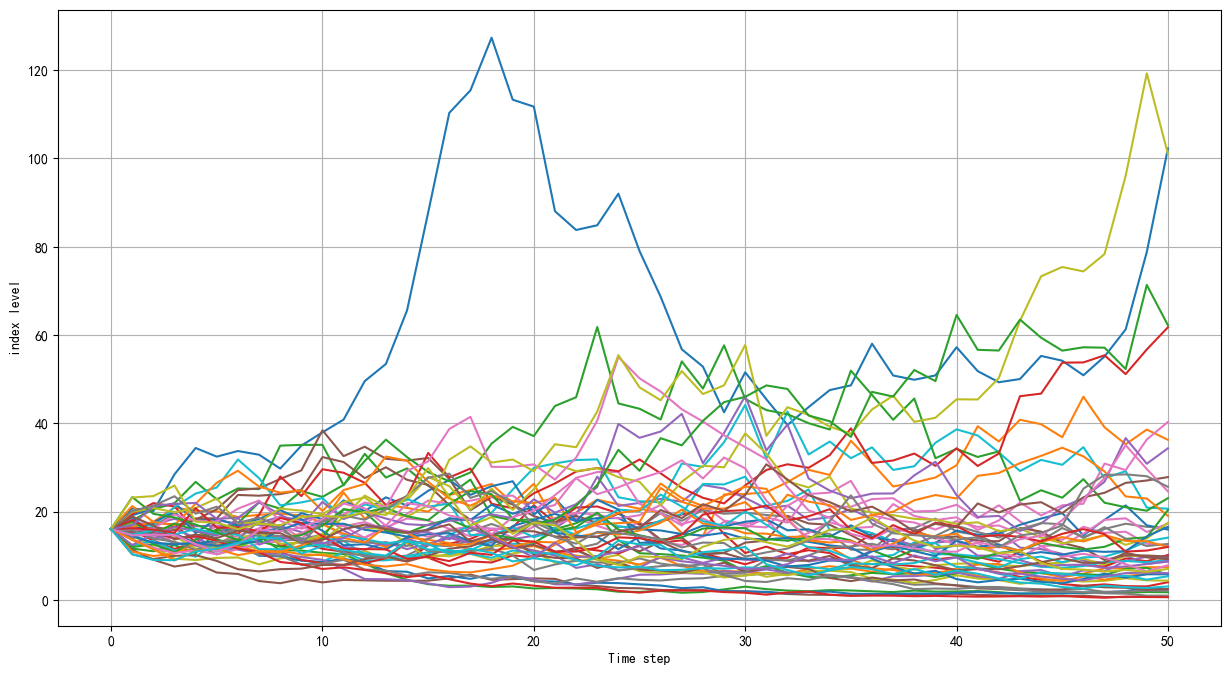

In [20]:
C_0, S = MonteCarlo(convt_bond['Stkprc'][0],convt_bond['Cnvtprc'][0],convt_bond['T-t'][0],\
                    convt_bond['Riskfree'][0],convt_bond['sigma'][0],M,I)
print('European Option value %.6f'% C_0)
# Visualisation of selected simulated paths, first 50 paths simulated
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15,8))
plt.grid(True)
plt.xlabel('Time step')
plt.ylabel('index level')
for i in range(50):
    plt.plot(S.T[i])

In [21]:
MC_output = []
for i in range(len(convt_bond)):
    C_0, S = MonteCarlo(convt_bond['Stkprc'][i],convt_bond['Cnvtprc'][i],convt_bond['T-t'][i],\
                        convt_bond['Riskfree'][i],convt_bond['sigma'][i],M,I)
    MC_output.append(C_0)

convt_bond['TheoryPrc_MC'] = convt_bond['PureBondPrc']+convt_bond['Convt_num']*MC_output
convt_bond

,Liscd,Trddt,CBprc,Perchge,Stkprc,Cnvtprc,Cnvtvalu,Cvtprmrt,Convt_num,Cond_redempt,...,Riskfree,T-t,PureBondPrc,sigma,d1,d2,C,TheoryPrc_BS,TheoryPrc_BT,TheoryPrc_MC
0,123006,2018-01-29,121.650,21.65,16.08,13.69,117.4580,3.5877,7.304602,17.797,...,0.038433,5.893151,84.887629,0.438580,0.896209,-0.168481,8.376579,146.075205,117.457999,146.294182
1,123006,2018-01-30,120.617,-0.85,15.88,13.69,115.9971,4.0026,7.304602,17.797,...,0.038533,5.890411,84.848937,0.438666,0.884901,-0.179749,8.215999,144.863537,115.997078,145.082480
2,123006,2018-01-31,118.600,-1.67,15.29,13.69,111.6874,6.2108,7.304602,17.797,...,0.038337,5.887671,84.950749,0.438845,0.848193,-0.216642,7.734913,141.451206,111.687363,141.668861
3,123006,2018-02-01,117.999,-0.51,15.15,13.69,110.6647,6.6492,7.304602,17.797,...,0.038339,5.884932,84.958556,0.440137,0.840081,-0.227642,7.634673,140.726801,110.664719,140.948979
4,123006,2018-02-02,119.081,0.92,15.15,13.69,110.6647,7.6278,7.304602,17.797,...,0.038340,5.882192,84.966839,0.440190,0.839962,-0.227641,7.633722,140.728138,110.664719,140.950156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,123006,2019-05-06,127.500,-11.35,14.75,11.36,129.8415,-1.6871,8.802817,14.768,...,0.031467,4.627397,91.601708,0.469217,0.907662,-0.101688,7.552469,158.084707,129.841549,158.229440
304,123006,2019-05-07,131.351,3.02,15.04,11.36,132.3944,-0.6733,8.802817,14.768,...,0.031628,4.624658,91.544393,0.480869,0.929858,-0.104252,7.889957,160.998237,132.394366,161.179387
305,123006,2019-05-08,131.880,0.40,15.05,11.36,132.4824,-0.3392,8.802817,14.768,...,0.031537,4.621918,91.588968,0.478380,0.929453,-0.098999,7.873862,160.901129,132.482394,161.073186
306,123006,2019-05-09,131.901,0.02,15.05,11.36,132.4824,-0.3219,8.802817,14.768,...,0.031420,4.619178,91.644030,0.478078,0.928751,-0.098747,7.867309,160.898513,132.482394,161.069203


## Extraction of results

In [22]:
result = convt_bond[['Trddt','CBprc','Stkprc','Cnvtprc','Convt_num','Cond_redempt','Percnvt','PureBondPrc',\
                     'TheoryPrc_BS','TheoryPrc_BT','TheoryPrc_MC']]
result

,Trddt,CBprc,Stkprc,Cnvtprc,Convt_num,Cond_redempt,Percnvt,PureBondPrc,TheoryPrc_BS,TheoryPrc_BT,TheoryPrc_MC
0,2018-01-29,121.650,16.08,13.69,7.304602,17.797,0.000000,84.887629,146.075205,117.457999,146.294182
1,2018-01-30,120.617,15.88,13.69,7.304602,17.797,0.000072,84.848937,144.863537,115.997078,145.082480
2,2018-01-31,118.600,15.29,13.69,7.304602,17.797,0.000144,84.950749,141.451206,111.687363,141.668861
3,2018-02-01,117.999,15.15,13.69,7.304602,17.797,0.000217,84.958556,140.726801,110.664719,140.948979
4,2018-02-02,119.081,15.15,13.69,7.304602,17.797,0.000289,84.966839,140.728138,110.664719,140.950156
...,...,...,...,...,...,...,...,...,...,...,...
303,2019-05-06,127.500,14.75,11.36,8.802817,14.768,93.736702,91.601708,158.084707,129.841549,158.229440
304,2019-05-07,131.351,15.04,11.36,8.802817,14.768,94.537173,91.544393,160.998237,132.394366,161.179387
305,2019-05-08,131.880,15.05,11.36,8.802817,14.768,95.337644,91.588968,160.901129,132.482394,161.073186
306,2019-05-09,131.901,15.05,11.36,8.802817,14.768,96.138116,91.644030,160.898513,132.482394,161.069203


In [23]:
result['Convertible_Bond_Yield'] = (result['CBprc']/100-1)*100
result['Conversion_Yield'] = (result['Convt_num']*result['Stkprc']/100-1)*100
result['Conversion_Yield(At initial conversion price)'] = (result['Convt_num'][0]*result['Stkprc']/100-1)*100
result['Conversion_Premium_Rate'] = (result['CBprc']/(result['Convt_num']*result['Stkprc'])-1)*100
result['Conversion_Premium_Rate(At initial conversion price)'] = (result['CBprc']/(result['Convt_num'][0]*result['Stkprc'])-1)*100
result['Stock_Parity'] = result['Stkprc']*(1+result['Conversion_Premium_Rate']/100)
result['Stock_Parity(At initial conversion price)'] = result['Stkprc']*(1+result['Conversion_Premium_Rate(At initial conversion price)']/100)
result.set_index(['Trddt'],inplace=True)
result

,CBprc,Stkprc,Cnvtprc,Convt_num,Cond_redempt,Percnvt,PureBondPrc,TheoryPrc_BS,TheoryPrc_BT,TheoryPrc_MC,Convertible_Bond_Yield,Conversion_Yield,Conversion_Yield(At initial conversion price),Conversion_Premium_Rate,Conversion_Premium_Rate(At initial conversion price),Stock_Parity,Stock_Parity(At initial conversion price)
Trddt,,,,,,,,,,,,,,,,,
2018-01-29,121.650,16.08,13.69,7.304602,17.797,0.000000,84.887629,146.075205,117.457999,146.294182,21.650,17.457999,17.457999,3.568937,3.568937,16.653885,16.653885
2018-01-30,120.617,15.88,13.69,7.304602,17.797,0.000072,84.848937,144.863537,115.997078,145.082480,20.617,15.997078,15.997078,3.982792,3.982792,16.512467,16.512467
2018-01-31,118.600,15.29,13.69,7.304602,17.797,0.000144,84.950749,141.451206,111.687363,141.668861,18.600,11.687363,11.687363,6.189274,6.189274,16.236340,16.236340
2018-02-01,117.999,15.15,13.69,7.304602,17.797,0.000217,84.958556,140.726801,110.664719,140.948979,17.999,10.664719,10.664719,6.627479,6.627479,16.154063,16.154063
2018-02-02,119.081,15.15,13.69,7.304602,17.797,0.000289,84.966839,140.728138,110.664719,140.950156,19.081,10.664719,10.664719,7.605207,7.605207,16.302189,16.302189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-06,127.500,14.75,11.36,8.802817,14.768,93.736702,91.601708,158.084707,129.841549,158.229440,27.500,29.841549,7.742878,-1.803390,18.337288,14.484000,17.454750
2019-05-07,131.351,15.04,11.36,8.802817,14.768,94.537173,91.544393,160.998237,132.394366,161.179387,31.351,32.394366,9.861213,-0.788074,19.560850,14.921474,17.981952
2019-05-08,131.880,15.05,11.36,8.802817,14.768,95.337644,91.588968,160.901129,132.482394,161.073186,31.880,32.482394,9.934259,-0.454698,19.962605,14.981568,18.054372


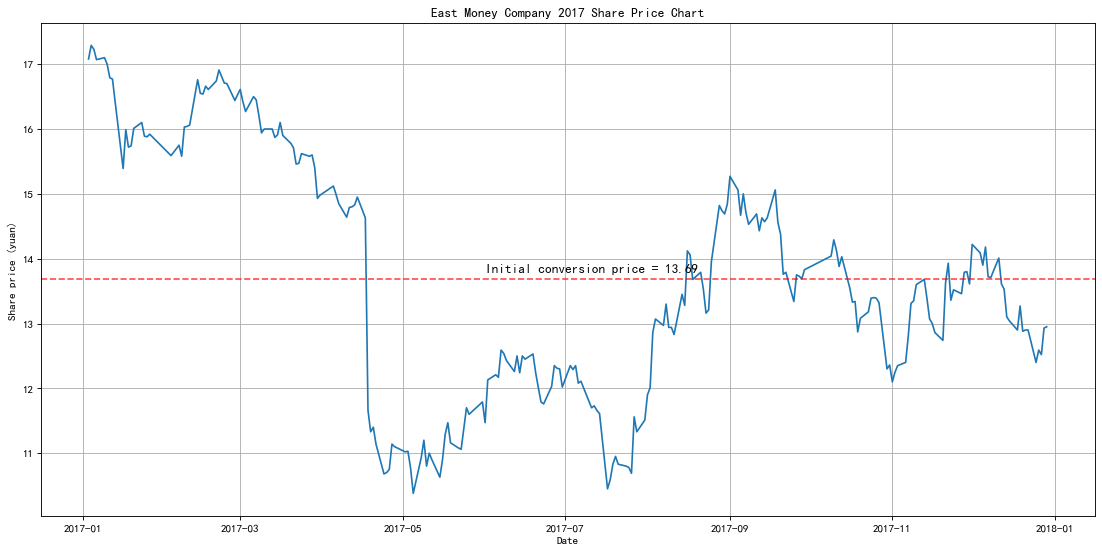

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(17,8),dpi=80)

## East Money Company 2017 share price data
data1 = stk_data.set_index('Trddt').loc[:'2017']['Clsprc']
plt.plot(data1)

## Initial conversion price
line1 = result['Cnvtprc'].unique()[0]
plt.axhline(y = line1, color = 'r', linestyle = '--',alpha=0.7)
ax.text(data1.index[int((len(data1)/2.5))], line1+0.1, 'Initial conversion price = ' + str(line1), size=12)

plt.ylabel("Share price (yuan)")
plt.xlabel("Date")
plt.title('East Money Company 2017 Share Price Chart')
plt.grid(True)
plt.show()

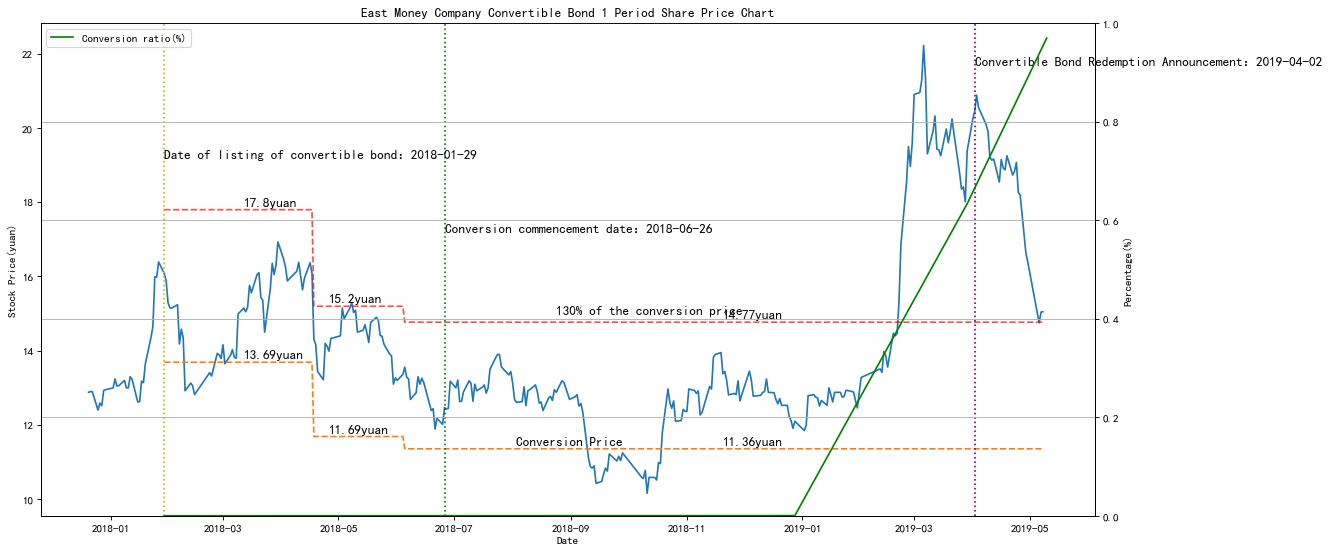

In [25]:
fig, ax = plt.subplots(figsize=(17,8),dpi=80)

## Share price data for East Money Company Convertible Bond 1 period
data2 = stk_data.set_index('Trddt').loc['2017-12-20':'2019-05-08']['Clsprc']
ax.plot(data2,label='East Money Company Share Price (yuan)')

## Conversion price
line2 = result.loc['2017-12-20':'2019-05-08']['Cnvtprc']
plt.plot(line2,linestyle = '--')
ax.text(data2.index[int((len(data2)/2.2))], line2[int(len(line2)/2)]+0.1, 'Conversion Price', size=12)
ax.text(data2.index[int((len(data2)/6.3))], line2[int(len(line2)/6.3)]+0.1, str(line2[int(len(line2)/6.3)])+'yuan', size=12)
ax.text(data2.index[int((len(data2)/4))], line2[int(len(line2)/4)]+0.1, str(line2[int(len(line2)/4)])+'yuan', size=12)
ax.text(data2.index[int((len(data2)/1.5))], line2[int(len(line2)/1.5)]+0.1, str(line2[int(len(line2)/1.5)])+'yuan', size=12)

## 130% of the conversion price
plt.plot(line2*1.3,linestyle = '--',color='r',alpha=0.7)
ax.text(data2.index[int((len(data2)/2))], line2[int(len(line2)/2)]*1.3+0.2, '130% of the conversion price', size=12)
ax.text(data2.index[int((len(data2)/6.3))], line2[int(len(line2)/6.3)]*1.3+0.1, \
        str(round(line2[int(len(line2)/6.3)]*1.3,2))+'yuan', size=12)
ax.text(data2.index[int((len(data2)/4))], line2[int(len(line2)/4)]*1.3+0.1, \
        str(round(line2[int(len(line2)/4)]*1.3,2))+'yuan', size=12)
ax.text(data2.index[int((len(data2)/1.5))], line2[int(len(line2)/1.5)]*1.3+0.1, \
        str(round(line2[int(len(line2)/1.5)]*1.3,2))+'yuan', size=12)

## Date of listing of convertible bond
ListingDate = pd.to_datetime('2018-01-29') 
plt.axvline(x = ListingDate, color = 'y', linestyle = 'dotted')
ax.text(ListingDate, data2.mean()+5, 'Date of listing of convertible bond：'+str(ListingDate)[:10], size=12)

## Conversion commencement date
ConversionStartDate = pd.to_datetime('2018-06-26')
plt.axvline(x = ConversionStartDate, color = 'g', linestyle = 'dotted')
ax.text(ConversionStartDate, data2.mean()+3, 'Conversion commencement date：'+str(ConversionStartDate)[:10], size=12)

## Convertible Bond Redemption Announcement
RedemptionDate = pd.to_datetime('2019-04-02')
plt.axvline(x = RedemptionDate, color = 'purple', linestyle = 'dotted')
ax.text(RedemptionDate, data2.mean()+7.5, 'Convertible Bond Redemption Announcement：'+str(RedemptionDate)[:10], size=12)

plt.ylabel("Stock Price(yuan)")
plt.xlabel("Date")
plt.title('East Money Company Convertible Bond 1 Period Share Price Chart')

## Conversion ratio
ax2 = ax.twinx()
ax2.set_ylim(0, 1)
ax2.plot(result['Percnvt']/100, label = 'Conversion ratio(%)',color='g')

plt.ylabel("Percentage(%)")

plt.grid(True)
plt.legend()

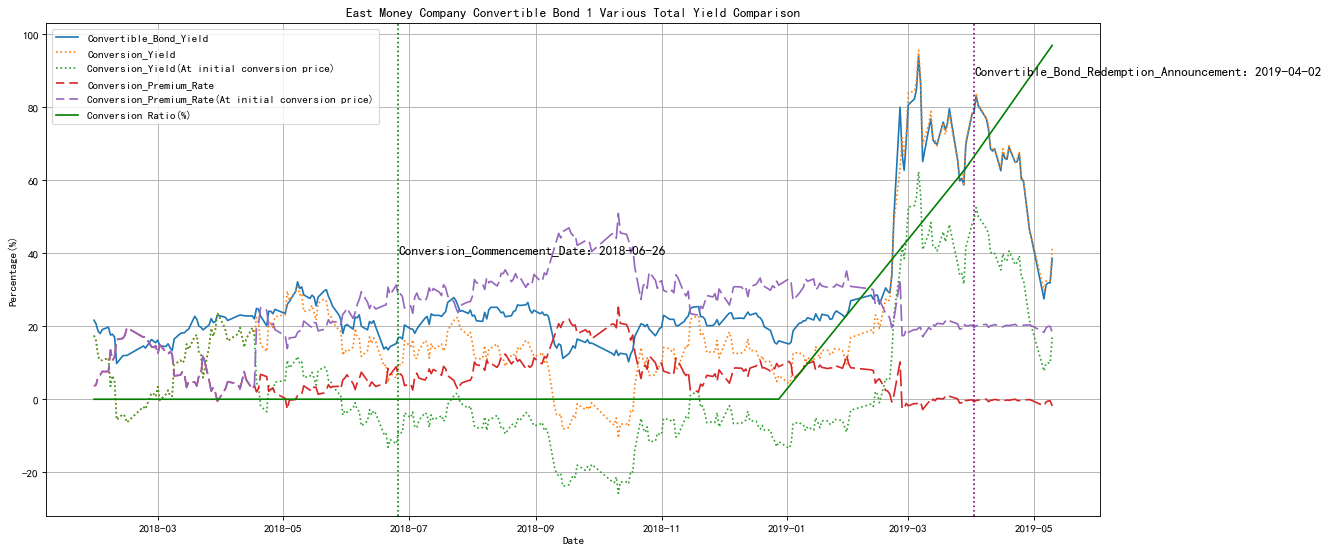

In [26]:
fig, ax = plt.subplots(figsize=(17,8),dpi=80)

## Convertible_Bond_Yield
plt.plot(result['Convertible_Bond_Yield'],label='Convertible_Bond_Yield')

## Conversion_Yield
plt.plot(result['Conversion_Yield'],linestyle = 'dotted',label='Conversion_Yield')

## Conversion_Yield(At initial conversion price)
plt.plot(result['Conversion_Yield(At initial conversion price)'],linestyle = 'dotted',label='Conversion_Yield(At initial conversion price)')

## Conversion_Premium_Rate
plt.plot(result['Conversion_Premium_Rate'],linestyle = (5, (10, 3)),label='Conversion_Premium_Rate')

## Conversion_Premium_Rate(At initial conversion price)
plt.plot(result['Conversion_Premium_Rate(At initial conversion price)'],linestyle = (5, (10, 3)),label='Conversion_Premium_Rate(At initial conversion price)')

## Conversion commencement date
plt.axvline(x = ConversionStartDate, color = 'g', linestyle = 'dotted')
ax.text(ConversionStartDate, result['Convertible_Bond_Yield'].mean()+11, 'Conversion_Commencement_Date：'+str(ConversionStartDate)[:10], size=12)

## Convertible Bond Redemption Announcement
RedemptionDate = pd.to_datetime('2019-04-02')
plt.axvline(x = RedemptionDate, color = 'purple', linestyle = 'dotted')
ax.text(RedemptionDate, result['Convertible_Bond_Yield'].mean()+60, 'Convertible_Bond_Redemption_Announcement：'+str(RedemptionDate)[:10], size=12)

## Conversion Ratio
plt.plot(result['Percnvt'], label = 'Conversion Ratio(%)',color='g')

plt.ylabel('Percentage(%)')
plt.xlabel("Date")
plt.title('East Money Company Convertible Bond 1 Various Total Yield Comparison')
plt.grid(True)
plt.legend()

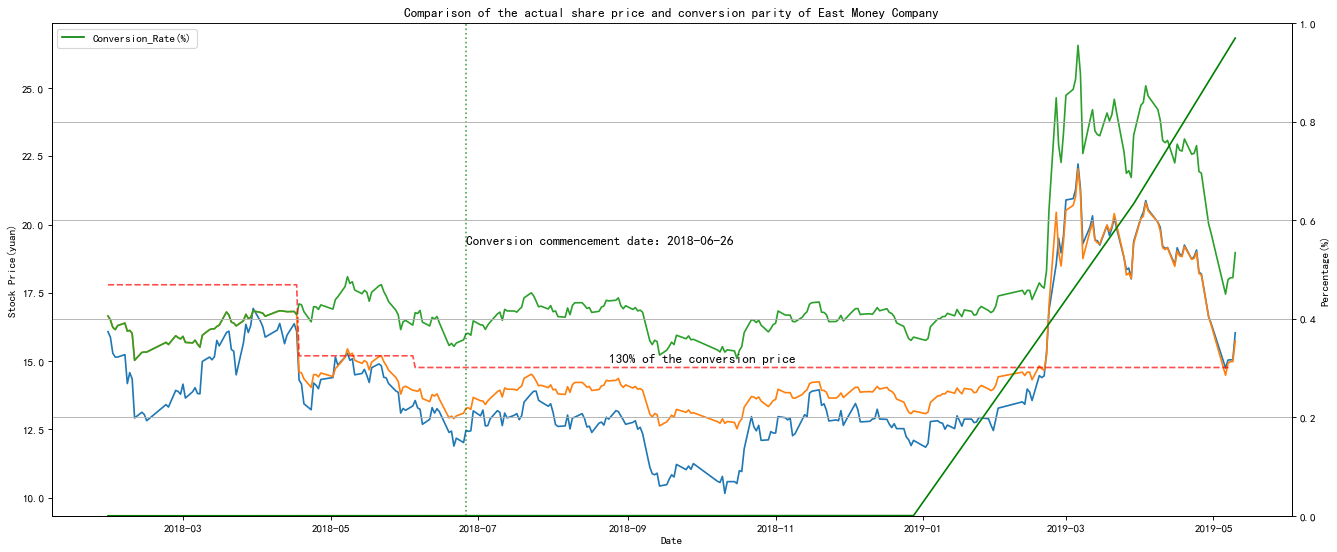

In [27]:
fig, ax = plt.subplots(figsize=(20,8),dpi=80)

## Actual_Stock_Price
plt.plot(result['Stkprc'],label='Actual_Stock_Price')

## Stock_Parity
plt.plot(result['Stock_Parity'],label='Stock_Parity')

## Stock_Parity(At initial conversion price)
plt.plot(result['Stock_Parity(At initial conversion price)'],label='Stock_Parity(At initial conversion price)')

## 130% of the conversion price
plt.plot(line2*1.3,linestyle = '--',color='r',alpha=0.7)
ax.text(data2.index[int((len(data2)/2))], line2[int(len(line2)/2)]*1.3+0.2, '130% of the conversion price', size=12)

## Conversion commencement date
plt.axvline(x = ConversionStartDate, color = 'g', linestyle = 'dotted',alpha=0.7)
ax.text(ConversionStartDate, result['Stkprc'].mean()+5, 'Conversion commencement date：'+str(ConversionStartDate)[:10], size=12)

plt.ylabel("Stock Price(yuan)")
plt.xlabel("Date")
plt.title('Comparison of the actual share price and conversion parity of East Money Company')

## Conversion Rate
ax2 = ax.twinx()
ax2.set_ylim(0, 1)
ax2.plot(result['Percnvt']/100, label = 'Conversion_Rate(%)',color='g')

plt.ylabel("Percentage(%)")

plt.grid(True)
plt.legend()

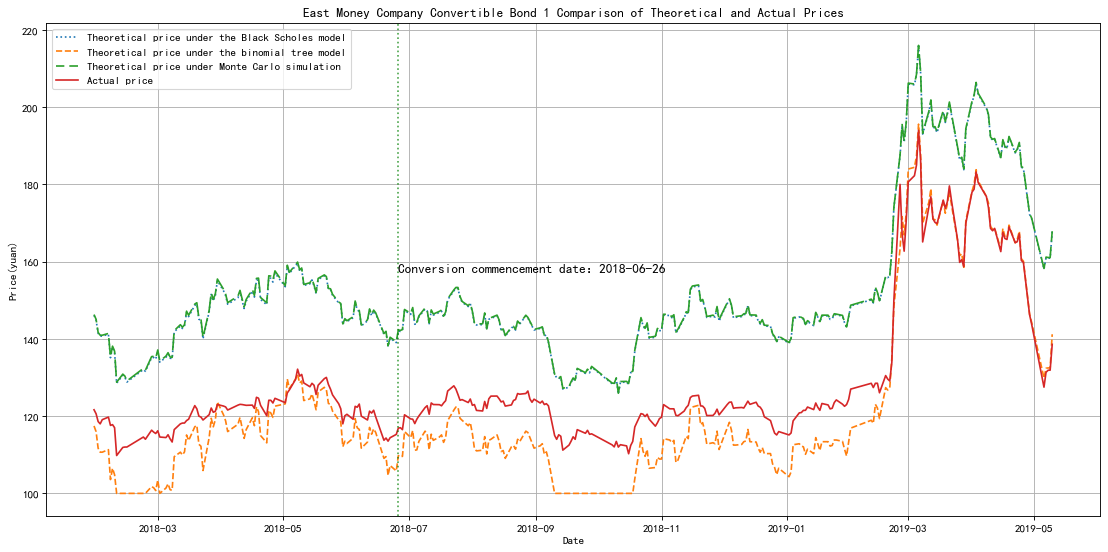

In [28]:
fig, ax = plt.subplots(figsize=(17,8),dpi=80)

## Theoretical price under the Black Scholes model
plt.plot(result['TheoryPrc_BS'],label='Theoretical price under the Black Scholes model',linestyle = 'dotted')

## Theoretical price under the binomial tree model
plt.plot(result['TheoryPrc_BT'],label='Theoretical price under the binomial tree model',linestyle = 'dashed')

## Theoretical price under Monte Carlo simulation
plt.plot(result['TheoryPrc_MC'],label='Theoretical price under Monte Carlo simulation',linestyle = (5, (10, 3)))

## Actual price
plt.plot(result['CBprc'],label='Actual price')

## Conversion commencement date
plt.axvline(x = ConversionStartDate, color = 'g', linestyle = 'dotted',alpha=0.7)
ax.text(ConversionStartDate, result['TheoryPrc_BS'].mean()+5, 'Conversion commencement date：'+str(ConversionStartDate)[:10], size=12)

plt.title('East Money Company Convertible Bond 1 Comparison of Theoretical and Actual Prices')
plt.ylabel("Price(yuan)")
plt.xlabel("Date")
plt.grid(True)
plt.legend()

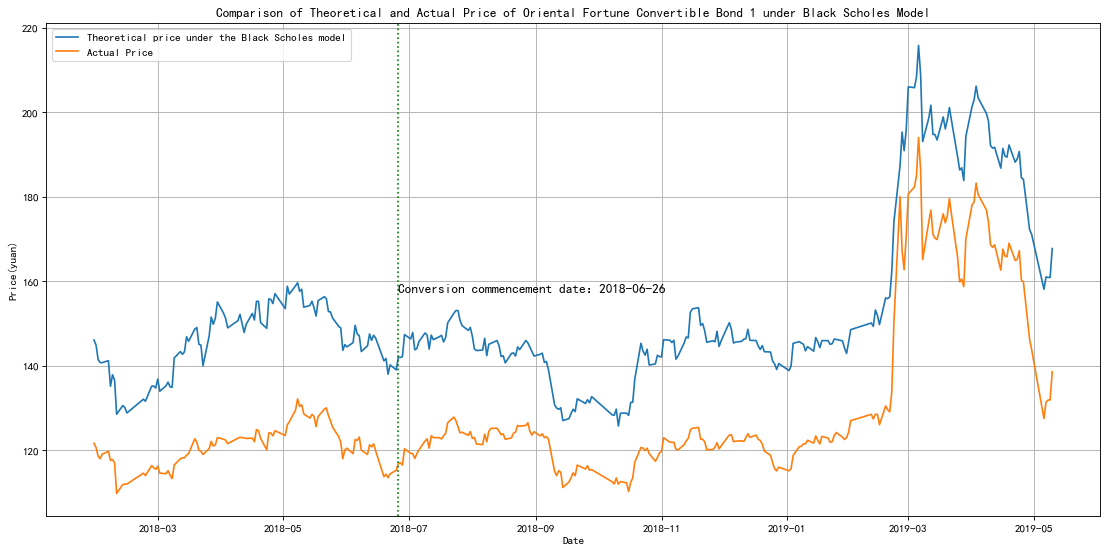

In [29]:
fig, ax = plt.subplots(figsize=(17,8),dpi=80)

## Theoretical price under the Black Scholes model
plt.plot(result['TheoryPrc_BS'],label='Theoretical price under the Black Scholes model')

## Actual Price
plt.plot(result['CBprc'],label='Actual Price')

## Conversion commencement date
plt.axvline(x = ConversionStartDate, color = 'g', linestyle = 'dotted')
ax.text(ConversionStartDate, result['TheoryPrc_BS'].mean()+5, 'Conversion commencement date：'+str(ConversionStartDate)[:10], size=12)

plt.title('Comparison of Theoretical and Actual Price of Oriental Fortune Convertible Bond 1 under Black Scholes Model')
plt.ylabel("Price(yuan)")
plt.xlabel("Date")
plt.grid(True)
plt.legend()

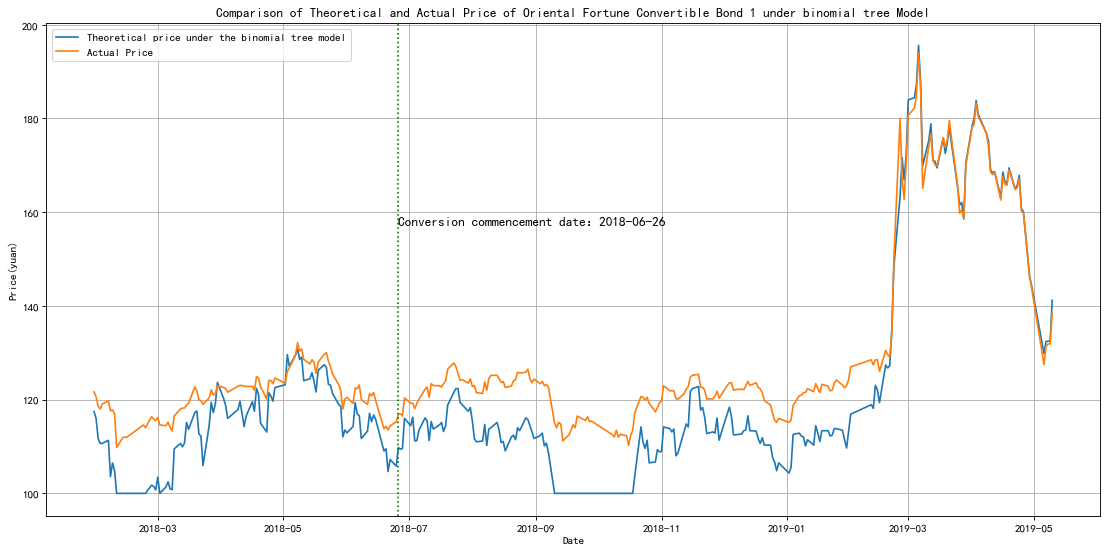

In [30]:
fig, ax = plt.subplots(figsize=(17,8),dpi=80)

## Theoretical price under the binomial tree model
plt.plot(result['TheoryPrc_BT'],label='Theoretical price under the binomial tree model')

## Actual Price
plt.plot(result['CBprc'],label='Actual Price')

## Conversion commencement date
plt.axvline(x = ConversionStartDate, color = 'g', linestyle = 'dotted')
ax.text(ConversionStartDate, result['TheoryPrc_BS'].mean()+5, 'Conversion commencement date：'+str(ConversionStartDate)[:10], size=12)

plt.title('Comparison of Theoretical and Actual Price of Oriental Fortune Convertible Bond 1 under binomial tree Model')
plt.ylabel("Price(yuan)")
plt.xlabel("Date")
plt.grid(True)
plt.legend()

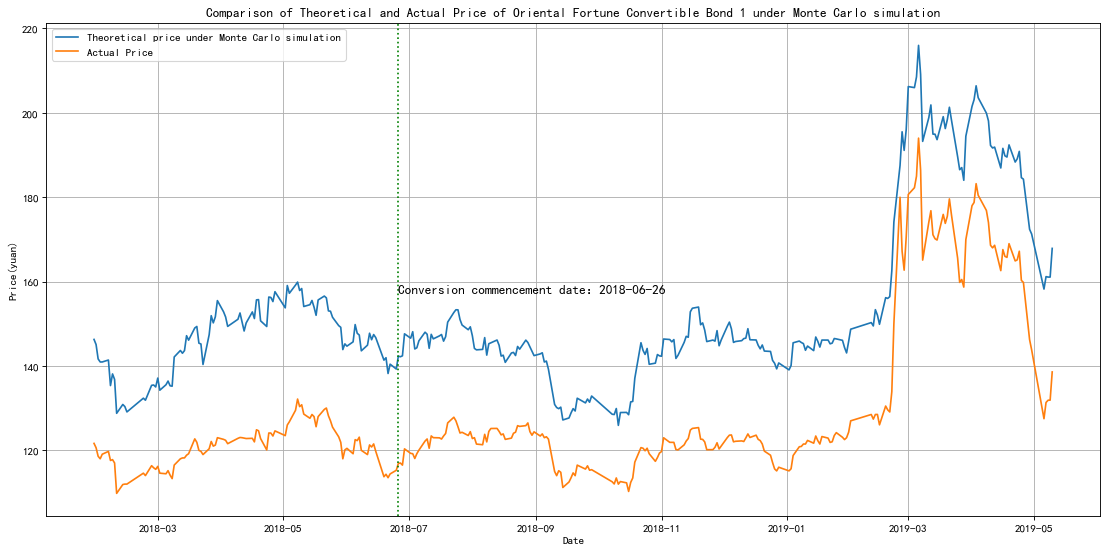

In [31]:
fig, ax = plt.subplots(figsize=(17,8),dpi=80)

## Theoretical price under Monte Carlo simulation
plt.plot(result['TheoryPrc_MC'],label='Theoretical price under Monte Carlo simulation')

## Actual Price
plt.plot(result['CBprc'],label='Actual Price')

## Conversion commencement date
plt.axvline(x = ConversionStartDate, color = 'g', linestyle = 'dotted')
ax.text(ConversionStartDate, result['TheoryPrc_BS'].mean()+5, 'Conversion commencement date：'+str(ConversionStartDate)[:10], size=12)

plt.title('Comparison of Theoretical and Actual Price of Oriental Fortune Convertible Bond 1 under Monte Carlo simulation')
plt.ylabel("Price(yuan)")
plt.xlabel("Date")
plt.grid(True)
plt.legend()

### Error Measurement

In [32]:
## Calculate the percentage deviation from the Black Scholes model
result['PctDev_BS'] = (result['TheoryPrc_BS']/result['CBprc']-1)*100

## Calculate the percentage deviation of the Binary Tree model
result['PctDev_BT'] = (result['TheoryPrc_BT']/result['CBprc']-1)*100

## Calculate the percentage deviation from the Monte Carlo model
result['PctDev_MC'] = (result['TheoryPrc_MC']/result['CBprc']-1)*100
result

,CBprc,Stkprc,Cnvtprc,Convt_num,Cond_redempt,Percnvt,PureBondPrc,TheoryPrc_BS,TheoryPrc_BT,TheoryPrc_MC,Convertible_Bond_Yield,Conversion_Yield,Conversion_Yield(At initial conversion price),Conversion_Premium_Rate,Conversion_Premium_Rate(At initial conversion price),Stock_Parity,Stock_Parity(At initial conversion price),PctDev_BS,PctDev_BT,PctDev_MC
Trddt,,,,,,,,,,,,,,,,,,,,
2018-01-29,121.650,16.08,13.69,7.304602,17.797,0.000000,84.887629,146.075205,117.457999,146.294182,21.650,17.457999,17.457999,3.568937,3.568937,16.653885,16.653885,20.078262,-3.445953,20.258268
2018-01-30,120.617,15.88,13.69,7.304602,17.797,0.000072,84.848937,144.863537,115.997078,145.082480,20.617,15.997078,15.997078,3.982792,3.982792,16.512467,16.512467,20.102090,-3.830241,20.283608
2018-01-31,118.600,15.29,13.69,7.304602,17.797,0.000144,84.950749,141.451206,111.687363,141.668861,18.600,11.687363,11.687363,6.189274,6.189274,16.236340,16.236340,19.267458,-5.828530,19.450979
2018-02-01,117.999,15.15,13.69,7.304602,17.797,0.000217,84.958556,140.726801,110.664719,140.948979,17.999,10.664719,10.664719,6.627479,6.627479,16.154063,16.154063,19.261012,-6.215545,19.449299
2018-02-02,119.081,15.15,13.69,7.304602,17.797,0.000289,84.966839,140.728138,110.664719,140.950156,19.081,10.664719,10.664719,7.605207,7.605207,16.302189,16.302189,18.178499,-7.067694,18.364941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-06,127.500,14.75,11.36,8.802817,14.768,93.736702,91.601708,158.084707,129.841549,158.229440,27.500,29.841549,7.742878,-1.803390,18.337288,14.484000,17.454750,23.988006,1.836509,24.101521
2019-05-07,131.351,15.04,11.36,8.802817,14.768,94.537173,91.544393,160.998237,132.394366,161.179387,31.351,32.394366,9.861213,-0.788074,19.560850,14.921474,17.981952,22.571002,0.794334,22.708915
2019-05-08,131.880,15.05,11.36,8.802817,14.768,95.337644,91.588968,160.901129,132.482394,161.073186,31.880,32.482394,9.934259,-0.454698,19.962605,14.981568,18.054372,22.005709,0.456775,22.136174


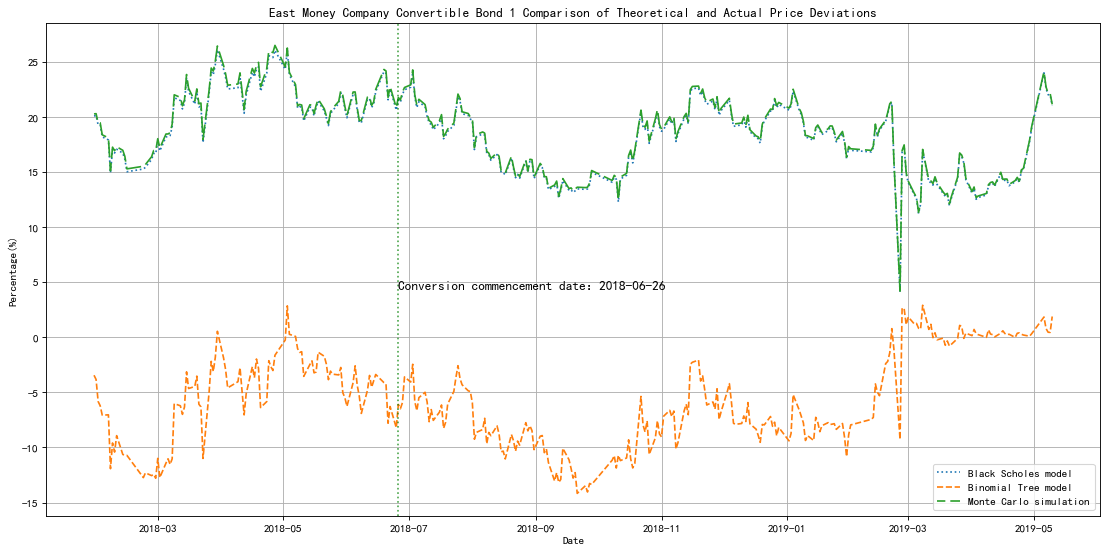

In [33]:
fig, ax = plt.subplots(figsize=(17,8),dpi=80)

## Theoretical price under the Black Scholes model
plt.plot(result['PctDev_BS'],label='Black Scholes model',linestyle = 'dotted')

## Theoretical price under the binomial tree model
plt.plot(result['PctDev_BT'],label='Binomial Tree model',linestyle = 'dashed')

## Theoretical price under Monte Carlo simulation
plt.plot(result['PctDev_MC'],label='Monte Carlo simulation',linestyle = (5, (10, 3)))

## Conversion commencement date
plt.axvline(x = ConversionStartDate, color = 'g', linestyle = 'dotted',alpha=0.7)
ax.text(ConversionStartDate, result['PctDev_BT'].mean()+10,'Conversion commencement date：'+str(ConversionStartDate)[:10], size=12)

plt.title('East Money Company Convertible Bond 1 Comparison of Theoretical and Actual Price Deviations')
plt.ylabel("Percentage(%)")
plt.xlabel("Date")
plt.grid(True)
plt.legend()

In [34]:
## RMSE for the Black Scholes model
print('RMSE for the Black Scholes model =', math.sqrt(mean_squared_error(result['TheoryPrc_BS'],result['Stkprc'])))

## RMSE for Binary Tree model
print('RMSE for Binary Tree model =', math.sqrt(mean_squared_error(result['TheoryPrc_BT'],result['Stkprc'])))

## RMSE for Monte Carlo model
print('RMSE for Monte Carlo model =', math.sqrt(mean_squared_error(result['TheoryPrc_MC'],result['Stkprc'])))

RMSE for the Black Scholes model = 139.08462137868116
RMSE for Binary Tree model = 109.54382508595498
RMSE for Monte Carlo model = 139.32380388810142


In [35]:
res_BS = sm.OLS(result['CBprc'], sm.add_constant(result['TheoryPrc_BS'])).fit()
res_BT = sm.OLS(result['CBprc'], sm.add_constant(result['TheoryPrc_BT'])).fit()
res_MC = sm.OLS(result['CBprc'], sm.add_constant(result['TheoryPrc_MC'])).fit()
print(res_BS.summary())
print(res_BT.summary())
print(res_MC.summary())

                            OLS Regression Results                            
Dep. Variable:                  CBprc   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     7542.
Date:                Mon, 21 Aug 2023   Prob (F-statistic):          1.20e-217
Time:                        10:32:33   Log-Likelihood:                -835.96
No. Observations:                 308   AIC:                             1676.
Df Residuals:                     306   BIC:                             1683.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.2698      1.660     -8.595   

In [36]:
window = 66 # Three months (on a trade day basis)

ols_r2 = pd.DataFrame(index=result.iloc[window:,:].index)
for j in ['BS','BT','MC']:
    temp = []
    for i in range(len(result)-window):
        data = result.iloc[i:i+window,:]
        res = sm.OLS(data['CBprc'], sm.add_constant(data['TheoryPrc_'+j])).fit()
        temp.append(res.rsquared)
    ols_r2[j+'_Rsquared'] = temp
ols_r2

,BS_Rsquared,BT_Rsquared,MC_Rsquared
Trddt,,,
2018-05-14,0.895220,0.913069,0.891764
2018-05-15,0.894433,0.914476,0.890926
2018-05-16,0.893115,0.916572,0.889509
2018-05-17,0.889945,0.916713,0.886196
2018-05-18,0.888968,0.917653,0.885120
...,...,...,...
2019-05-06,0.984710,0.982319,0.984743
2019-05-07,0.982986,0.980078,0.983035
2019-05-08,0.981549,0.978531,0.981597


#### To comprehend the interrelationship between theoretical and actual prices, this study employed a rolling regression analysis of actual prices against theoretical prices over a three-month period (equivalent to 66 trading days). The coefficient of determination (𝑅²) obtained from the rolling regression for a total sample of n-66 periods was extracted as a measure of the evolving linkage between the two over time. The final outcome is as follows:

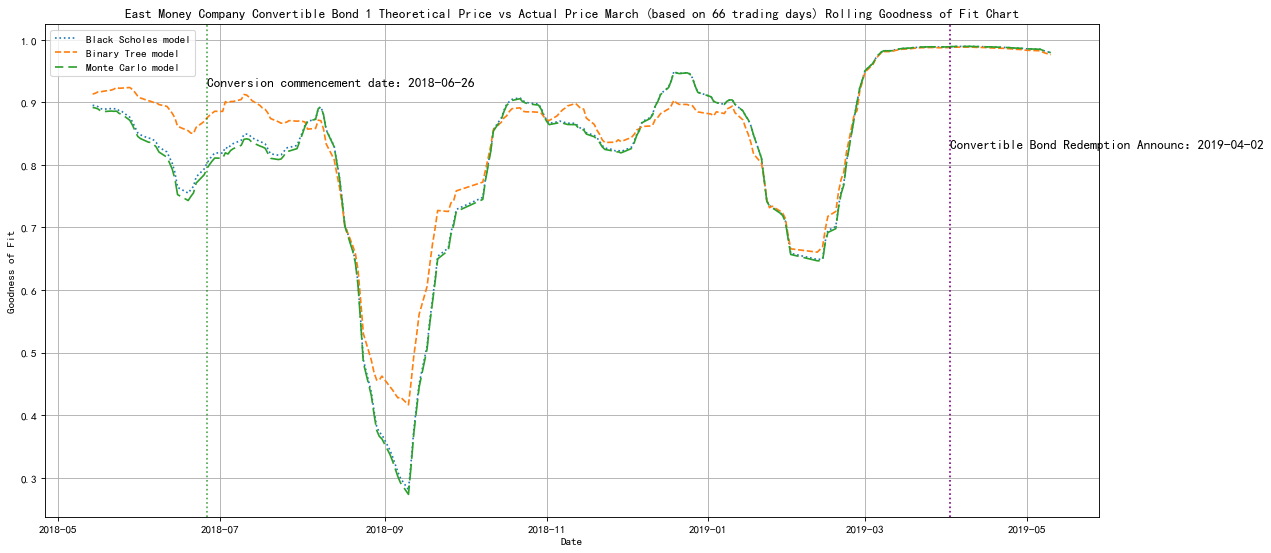

In [37]:
fig, ax = plt.subplots(figsize=(17,8),dpi=80)

## Rolling three-month (based on a total of 66 trading days) goodness-of-fit charts under the three mod
plt.plot(ols_r2['BS_Rsquared'], label = 'Black Scholes model',linestyle = 'dotted')
plt.plot(ols_r2['BT_Rsquared'], label = 'Binary Tree model',linestyle = 'dashed')
plt.plot(ols_r2['MC_Rsquared'], label = 'Monte Carlo model',linestyle = (5, (10, 3)))

## Conversion commencement date
plt.axvline(x = ConversionStartDate, color = 'g', linestyle = 'dotted', alpha=0.7)
ax.text(ConversionStartDate, ols_r2['BS_Rsquared'].mean()+0.1, 'Conversion commencement date：'+str(ConversionStartDate)[:10], size=12)

## Convertible Bond Redemption Announc
plt.axvline(x = RedemptionDate, color = 'purple', linestyle = 'dotted')
ax.text(RedemptionDate, ols_r2['BS_Rsquared'].mean(), 'Convertible Bond Redemption Announc：'+str(RedemptionDate)[:10], size=12)

plt.title('East Money Company Convertible Bond 1 Theoretical Price vs Actual Price March (based on 66 trading days) Rolling Goodness of Fit Chart')
plt.ylabel("Goodness of Fit")
plt.xlabel("Date")
plt.grid(True)
plt.legend()

#### It can be observed that within one month after the conversion initiation date, the theoretical prices derived from the three models show significant discrepancies with the actual prices during the period from August to October in the year 2018, as indicated by a sharp drop in the coefficient of determination from around 0.9 to below 0.3. This phenomenon also persists in the first quarter of the year 2019. This outcome coincides with the time point mentioned in the first part of this study, where the conversion premium rate began to increase steadily. This suggests that the linkage between actual and estimated theoretical prices in this interval is weakening over time. However, notably, around one month before and after the announcement of the convertible bond redemption, the coefficient of determination between the two starts to rise significantly, approaching 1. This is indicative of a high degree of linkage between them and the stock price fluctuations, as theoretical price calculations are based on stock price movements. However, understanding which price is rational and which might involve speculation cannot solely rely on their linkage deviations. Further analysis is needed, as this study proceeds to explore.

### Stock price and convertible bond linkage effect

#### Based on the mentioned uncertainties, employing the same rolling regression approach and extracting the coefficient of determination from each regression, this study substitutes the independent variable with the stock price to construct and gauge the evolving linkage between the two over time. The results are as follows:

In [38]:
res = sm.OLS(result['CBprc'], sm.add_constant(result['Stkprc'])).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  CBprc   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     1379.
Date:                Mon, 21 Aug 2023   Prob (F-statistic):          2.21e-115
Time:                        10:32:37   Log-Likelihood:                -1072.9
No. Observations:                 308   AIC:                             2150.
Df Residuals:                     306   BIC:                             2157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0066      2.565     13.649      0.0

In [39]:
ols_r2_stk = pd.DataFrame(index=result.index[window:])
temp = []
for i in range(len(result)-window):
    data = result.iloc[i:i+window,:]
    res = sm.OLS(data['CBprc'], sm.add_constant(data['Stkprc'])).fit()
    temp.append(res.rsquared)
ols_r2_stk['Rsquared'] = temp
ols_r2_stk

,Rsquared
Trddt,
2018-05-14,0.258528
2018-05-15,0.243109
2018-05-16,0.232913
2018-05-17,0.221252
2018-05-18,0.212783
...,...
2019-05-06,0.982319
2019-05-07,0.980078
2019-05-08,0.978531


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


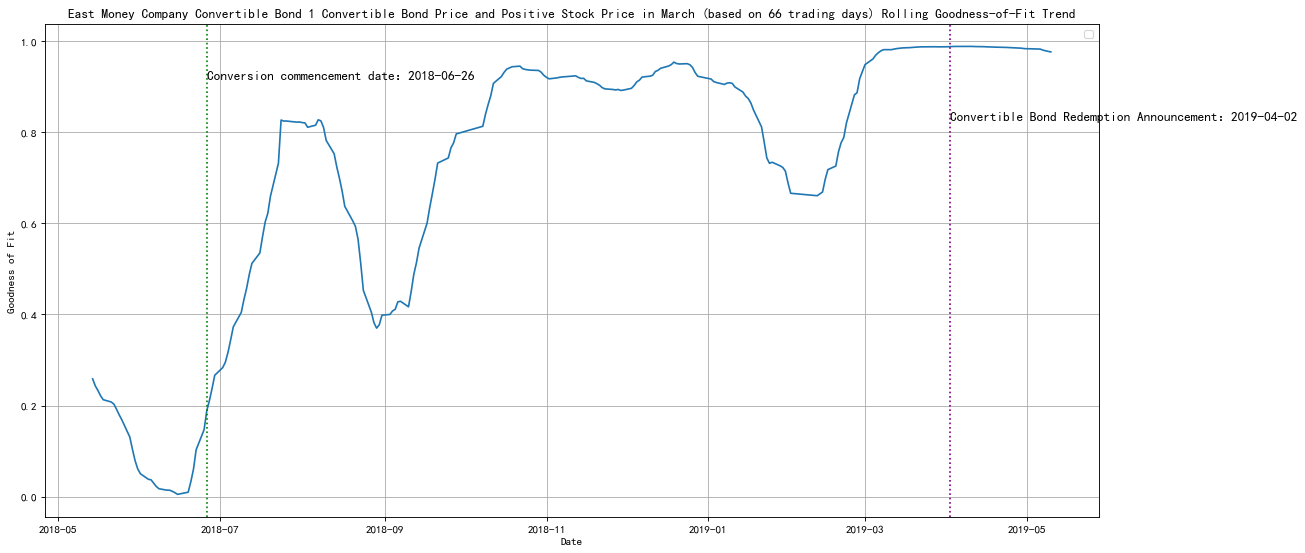

In [40]:
fig, ax = plt.subplots(figsize=(17,8),dpi=80)

## Rolling three-month (based on a total of 66 trading days) goodness-of-fit chart of convertible bond price versus the price of the underlying stock
plt.plot(ols_r2_stk['Rsquared'])

## Conversion commencement date
plt.axvline(x = ConversionStartDate, color = 'g', linestyle = 'dotted')
ax.text(ConversionStartDate, ols_r2_stk['Rsquared'].mean()+0.2, 'Conversion commencement date：'+str(ConversionStartDate)[:10], size=12)

## Convertible Bond Redemption Announcement
plt.axvline(x = RedemptionDate, color = 'purple', linestyle = 'dotted')
ax.text(RedemptionDate, ols_r2['BS_Rsquared'].mean(), 'Convertible Bond Redemption Announcement：'+str(RedemptionDate)[:10], size=12)

plt.title('East Money Company Convertible Bond 1 Convertible Bond Price and Positive Stock Price in March (based on 66 trading days) Rolling Goodness-of-Fit Trend')
plt.ylabel("Goodness of Fit")
plt.xlabel("Date")
plt.grid(True)
plt.legend()

#### It's evident that the results obtained through the same method, where the actual price of East Money Convertible Bond 1 is compared to the stock price, exhibit a striking resemblance to the trend discussed in the previous subsection. Specifically, in the same mentioned interval (post-conversion initiation), there is a temporary decrease in the coefficient of determination. This validates that the issues raised regarding the conversion premium rate are not coincidental but are a consequence of the deviation or loss of linkage between the actual price of the convertible bond and the stock price. This further reinforces the argument that the market for East Money Convertible Bond 1 has, to a certain extent, become relatively independent during this period, potentially due to the recurring phenomenon of speculation or market manipulation.

In [41]:
ols_r2_stk2 = pd.DataFrame(index=result.iloc[window:,:].index)
for j in ['BS','BT','MC']:
    temp = []
    for i in range(len(result)-window):
        data = result.iloc[i:i+window,:]
        res = sm.OLS(data['TheoryPrc_'+j], sm.add_constant(data['Stkprc'])).fit()
        temp.append(res.rsquared)
    ols_r2_stk2[j+'_Rsquared'] = temp
ols_r2_stk2

,BS_Rsquared,BT_Rsquared,MC_Rsquared
Trddt,,,
2018-05-14,0.320913,0.341468,0.319148
2018-05-15,0.315946,0.325813,0.314671
2018-05-16,0.314083,0.314532,0.313236
2018-05-17,0.310608,0.304869,0.310094
2018-05-18,0.306207,0.295101,0.306008
...,...,...,...
2019-05-06,0.999091,1.000000,0.999026
2019-05-07,0.999052,1.000000,0.998985
2019-05-08,0.999053,1.000000,0.998986


#### While the previous subsection has already highlighted the loss of linkage between the actual price of East Money Convertible Bond 1 and the stock price after the conversion initiation date, this single point alone doesn't provide a complete assertion. Therefore, we still need to continue examining the interrelationship between theoretical prices and the stock price to arrive at a conclusive standpoint. Employing a similar approach but setting the dependent variable as the theoretical price of the convertible bond and the independent variable as the stock price, the following results were obtained through rolling regression:

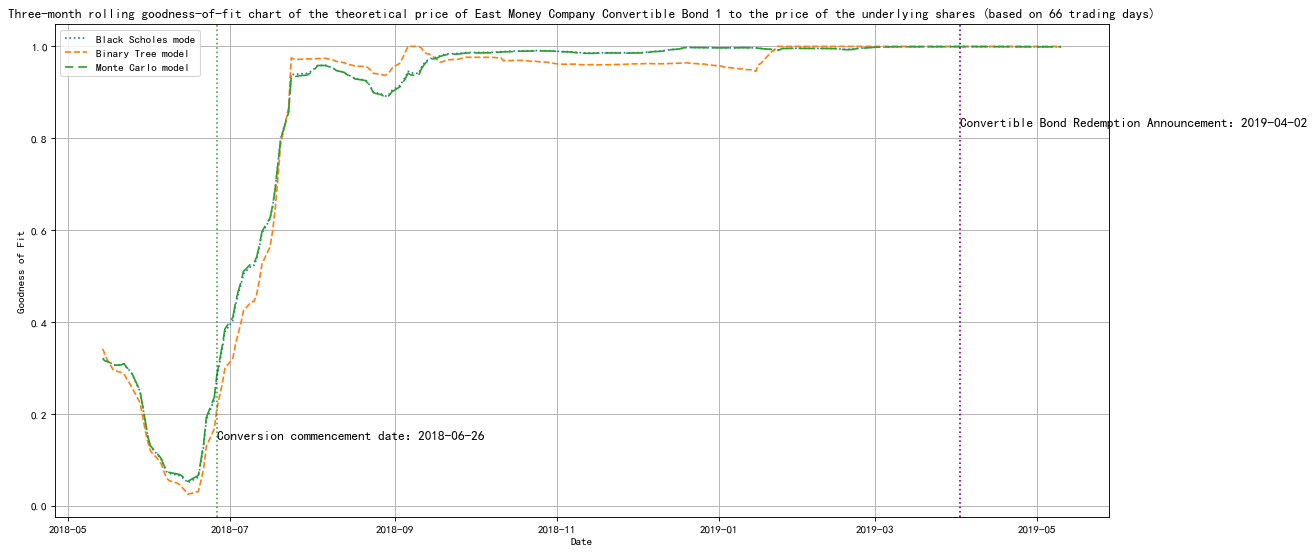

In [42]:
fig, ax = plt.subplots(figsize=(17,8),dpi=80)

## Rolling three-month (based on a total of 66 trading days) goodness-of-fit charts under the three models
plt.plot(ols_r2_stk2['BS_Rsquared'], label = 'Black Scholes mode',linestyle = 'dotted')
plt.plot(ols_r2_stk2['BT_Rsquared'], label = 'Binary Tree model',linestyle = 'dashed')
plt.plot(ols_r2_stk2['MC_Rsquared'], label = 'Monte Carlo model',linestyle = (5, (10, 3)))

## Conversion commencement date
plt.axvline(x = ConversionStartDate, color = 'g', linestyle = 'dotted', alpha=0.7)
ax.text(ConversionStartDate, ols_r2_stk2['BS_Rsquared'].mean()-0.7, 'Conversion commencement date：'+str(ConversionStartDate)[:10], size=12)

## 转债赎回公告
plt.axvline(x = RedemptionDate, color = 'purple', linestyle = 'dotted')
ax.text(RedemptionDate, ols_r2['BS_Rsquared'].mean(), 'Convertible Bond Redemption Announcement：'+str(RedemptionDate)[:10], size=12)

plt.title('Three-month rolling goodness-of-fit chart of the theoretical price of East Money Company Convertible Bond 1 to the price of the underlying shares (based on 66 trading days)')
plt.ylabel("Goodness of Fit")
plt.xlabel("Date")
plt.grid(True)
plt.legend()

#### The results indicate that within the interval from the conversion initiation date to the announcement of the convertible bond redemption, regardless of the convertible bond pricing model used, the coefficient of determination between the theoretical price of East Money Convertible Bond 1 and the stock price consistently remains above 0.9. This suggests a high degree of correlation between the two, implying that our estimated theoretical prices are reasonably aligned with the rational linkage to the stock price. No anomalous deviations in linkage, such as those mentioned in the preceding two subsections, were observed within this specific interval. Consequently, it can be concluded that the actual price of East Money Convertible Bond 1 is subject to speculative or manipulative behavior.